# XG Boost

### Modell erstellen, testen und speichern

In [1]:
from tqdm import tqdm
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Lade die Trainingsdaten
df_train = pd.read_json('training_dataFinal.json')

# Entfernen Sie alle Zeilen mit 'nan' Werten
df_train = df_train.dropna()

# Teile die Trainingsdaten in Features (X_train) und Zielvariable (y_train)
X_train = df_train.drop(['rent'], axis=1)  # Das Ziel ist 'rent'
y_train = df_train['rent']  # Das Ziel ist 'rent'

# Erstelle das XGBoost-Modell
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1,
                max_depth = 5, n_estimators = 100, verbose=True)

# Trainiere das Modell
model.fit(X_train, y_train)

# Lade die Testdaten
df_test = pd.read_json('test_dataFinal.json')

# Entfernen Sie alle Zeilen mit 'nan' Werten
df_test = df_test.dropna()

# Teile die Testdaten in Features (X_test) und Zielvariable (y_test)
X_test = df_test.drop(['rent'], axis=1)  # Das Ziel ist 'rent'
y_test = df_test['rent']  # Das Ziel ist 'rent'

# Mache eine Prognose mit den Testdaten
preds = model.predict(X_test)

# Speichern des Modells
model.save_model('xgboost_model.json')

# Berechne den RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, preds, squared=False)

# Gib die RMSE aus
print("RMSE: %f" % (rmse))

[15:29:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.

RMSE: 156.116331


### Feature Importance XG Boost

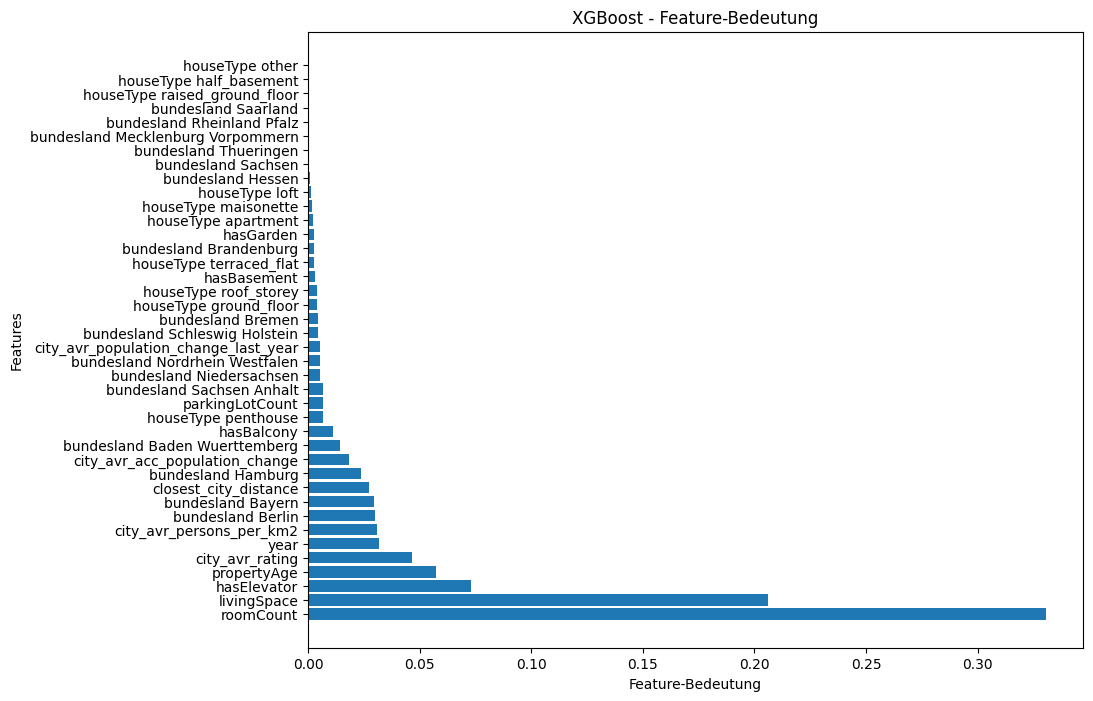

In [2]:
import matplotlib.pyplot as plt

# Gib die Feature-Bedeutung aus
feature_importance = model.feature_importances_

# Erstelle einen DataFrame für die Feature-Bedeutung
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature-Bedeutung')
plt.ylabel('Features')
plt.title('XGBoost - Feature-Bedeutung')
plt.show()

### Scatter Plot

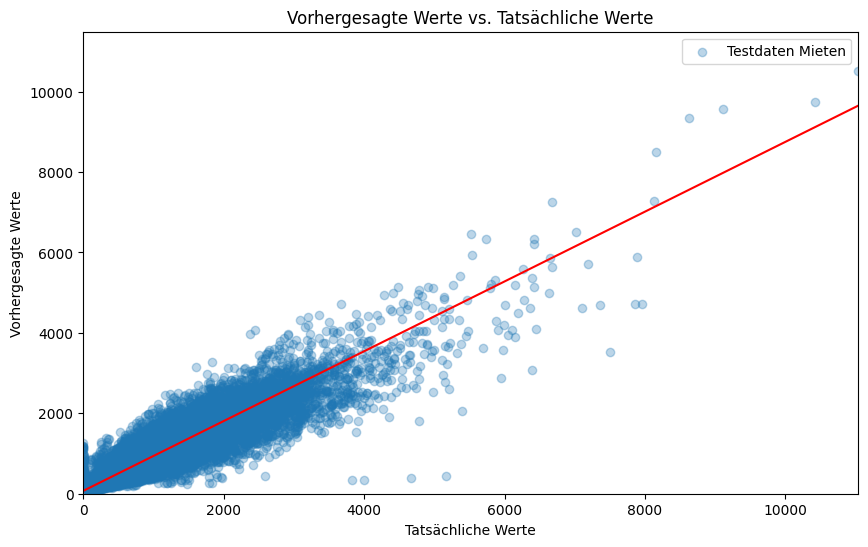

In [3]:
#Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, preds, alpha=0.3, label="Testdaten Mieten")
plt.title('Vorhergesagte Werte vs. Tatsächliche Werte')
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhergesagte Werte')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, preds, 1))(np.unique(y_test)), color='red') # hinzugefügte Linie
plt.xlim([0, max(y_test) * 0.1]) 
plt.ylim([0, max(preds) * 0.1]) 
plt.legend()
plt.show()

### Prognose erstellen

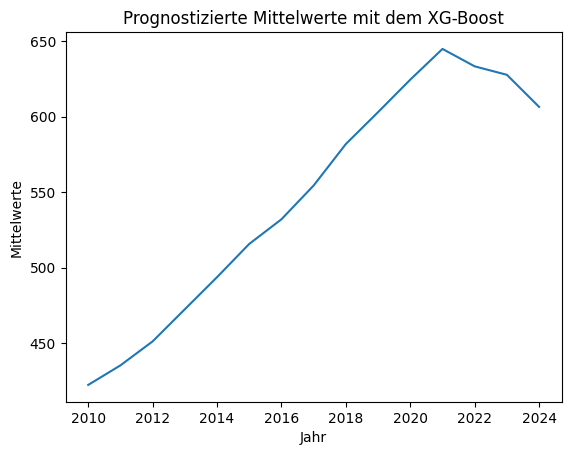

In [1]:
import json
import glob
import matplotlib.pyplot as plt
import statistics 
import os
from pathlib import Path

# Pfad zu den JSON-Dateien
current_directory = Path().resolve()
file_pattern = current_directory / "Historical_Data" / "trainingData_located*.json"

# Ein leeres Dictionary zur Aufnahme der Rent-Werte nach Jahr
rent_values_by_year = {}

# Durchlaufe alle Dateien, die dem Muster entsprechen
for file_name in glob.glob(str(file_pattern)):
    year_str = file_name.split("_located")[1].split(".json")[0]
    if not year_str.isdigit():
        continue
    year = int(year_str)
    with open(file_name, "r") as file:
        data = json.load(file)
        rents = [entry["rent"] for entry in data]
        rent_values_by_year[year] = rents

# Berechne die Medianwerte nach Jahr
median_rents = [statistics.mean(rent_values_by_year[year]) for year in sorted(rent_values_by_year.keys())]

# Erzeuge einen Plot der Medianwerte
years = sorted(rent_values_by_year.keys())
plt.plot(years, median_rents)
plt.xlabel("Jahr")
plt.ylabel("Mittelwerte")
plt.title("Prognostizierte Mittelwerte mit dem XG-Boost")
plt.show()

## Validierung XG Boost (min. 30 min zur Ausführung)

### Trainingsdaten aufteilen

In [2]:
import json

# Lese die ursprüngliche JSON-Datei
with open('training_dataFinal.json', 'r') as f:
    data = json.load(f)

# Listen für die zu speichernden Daten
data_10_to_15 = []
data_upper = []

# Durchlaufe alle Einträge in der Datenliste
for entry in data:
    year = entry['year']
    if 10 <= year <= 15:
        data_10_to_15.append(entry)
    elif year > 15:
        data_upper.append(entry)

# Speichere die gefilterten Daten in separaten JSON-Dateien
with open('training_dataFinal10to15.json', 'w') as f:
    json.dump(data_10_to_15, f)

In [3]:
import json

# Lese die ursprüngliche JSON-Datei
with open('training_dataFinal.json', 'r') as f:
    data = json.load(f)

# Listen für die zu speichernden Daten
data_10_to_15 = []
data_upper = []

# Durchlaufe alle Einträge in der Datenliste
for entry in data:
    year = entry['year']
    if 10 <= year <= 17:
        data_10_to_15.append(entry)
    elif year > 17:
        data_upper.append(entry)

# Speichere die gefilterten Daten in separaten JSON-Dateien
with open('training_dataFinal10to17.json', 'w') as f:
    json.dump(data_10_to_15, f)

In [4]:
import json

# Lese die ursprüngliche JSON-Datei
with open('training_dataFinal.json', 'r') as f:
    data = json.load(f)

# Listen für die zu speichernden Daten
data_10_to_15 = []
data_upper = []

# Durchlaufe alle Einträge in der Datenliste
for entry in data:
    year = entry['year']
    if 10 <= year <= 19:
        data_10_to_15.append(entry)
    elif year > 19:
        data_upper.append(entry)

# Speichere die gefilterten Daten in separaten JSON-Dateien
with open('training_dataFinal10to19.json', 'w') as f:
    json.dump(data_10_to_15, f)

### Modell trainieren (2010-2015)

In [5]:
from tqdm import tqdm
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Lade die Trainingsdaten
df_train = pd.read_json('training_dataFinal10to15.json')

# Entfernen Sie alle Zeilen mit 'nan' Werten
df_train = df_train.dropna()

# Teile die Trainingsdaten in Features (X_train) und Zielvariable (y_train)
X_train = df_train.drop(['rent'], axis=1)  # Das Ziel ist 'rent'
y_train = df_train['rent']  # Das Ziel ist 'rent'

# Erstelle das XGBoost-Modell
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1,
                max_depth = 5, n_estimators = 100, verbose=True)

# Trainiere das Modell
model.fit(X_train, y_train)

# Lade die Testdaten
df_test = pd.read_json('test_dataFinal.json')

# Entfernen Sie alle Zeilen mit 'nan' Werten
df_test = df_test.dropna()

# Teile die Testdaten in Features (X_test) und Zielvariable (y_test)
X_test = df_test.drop(['rent'], axis=1)  # Das Ziel ist 'rent'
y_test = df_test['rent']  # Das Ziel ist 'rent'

# Mache eine Prognose mit den Testdaten
preds = model.predict(X_test)

# Speichern des Modells
model.save_model('xgboost_model10to15.json')

# Berechne den RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, preds, squared=False)

# Gib die RMSE aus
print("RMSE: %f" % (rmse))

[16:29:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.

RMSE: 183.310078


### Modell trainieren (2010-2017)

In [6]:
from tqdm import tqdm
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Lade die Trainingsdaten
df_train = pd.read_json('training_dataFinal10to17.json')

# Entfernen Sie alle Zeilen mit 'nan' Werten
df_train = df_train.dropna()

# Teile die Trainingsdaten in Features (X_train) und Zielvariable (y_train)
X_train = df_train.drop(['rent'], axis=1)  # Das Ziel ist 'rent'
y_train = df_train['rent']  # Das Ziel ist 'rent'

# Erstelle das XGBoost-Modell
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1,
                max_depth = 5, n_estimators = 100, verbose=True)

# Trainiere das Modell
model.fit(X_train, y_train)

# Lade die Testdaten
df_test = pd.read_json('test_dataFinal.json')

# Entfernen Sie alle Zeilen mit 'nan' Werten
df_test = df_test.dropna()

# Teile die Testdaten in Features (X_test) und Zielvariable (y_test)
X_test = df_test.drop(['rent'], axis=1)  # Das Ziel ist 'rent'
y_test = df_test['rent']  # Das Ziel ist 'rent'

# Mache eine Prognose mit den Testdaten
preds = model.predict(X_test)

# Speichern des Modells
model.save_model('xgboost_model10to17.json')

# Berechne den RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, preds, squared=False)

# Gib die RMSE aus
print("RMSE: %f" % (rmse))

[16:33:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.

RMSE: 171.271923


### Modell trainieren (2010-2019)

In [1]:
from tqdm import tqdm
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Lade die Trainingsdaten
df_train = pd.read_json('training_dataFinal10to19.json')

# Entfernen Sie alle Zeilen mit 'nan' Werten
df_train = df_train.dropna()

# Teile die Trainingsdaten in Features (X_train) und Zielvariable (y_train)
X_train = df_train.drop(['rent'], axis=1)  # Das Ziel ist 'rent'
y_train = df_train['rent']  # Das Ziel ist 'rent'

# Erstelle das XGBoost-Modell
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1,
                max_depth = 5, n_estimators = 100, verbose=True)

# Trainiere das Modell
model.fit(X_train, y_train)

# Lade die Testdaten
df_test = pd.read_json('test_dataFinal.json')

# Entfernen Sie alle Zeilen mit 'nan' Werten
df_test = df_test.dropna()

# Teile die Testdaten in Features (X_test) und Zielvariable (y_test)
X_test = df_test.drop(['rent'], axis=1)  # Das Ziel ist 'rent'
y_test = df_test['rent']  # Das Ziel ist 'rent'

# Mache eine Prognose mit den Testdaten
preds = model.predict(X_test)

# Speichern des Modells
model.save_model('xgboost_model10to19.json')

# Berechne den RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, preds, squared=False)

# Gib die RMSE aus
print("RMSE: %f" % (rmse))

[16:55:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.

RMSE: 162.141794


### Plot "Durchschnittliche Mieten und Vorhersagen über die Jahre"

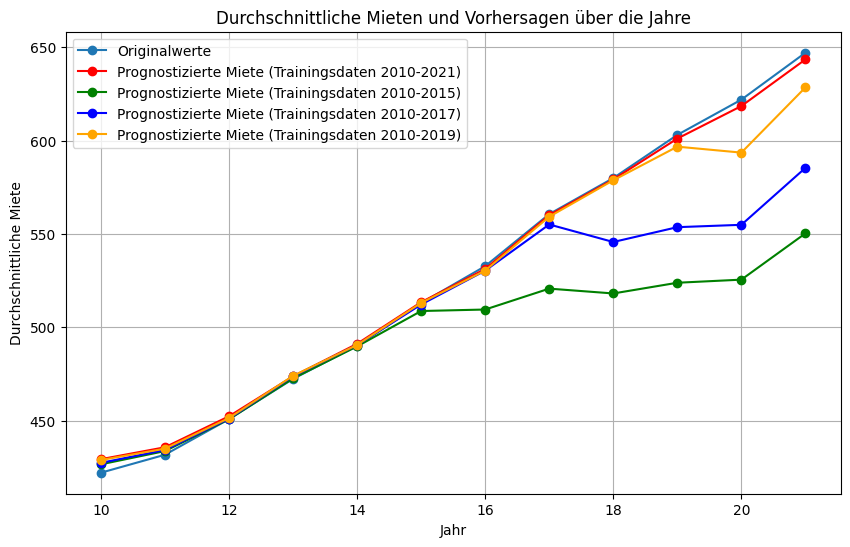

In [2]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

# Lade die Daten
df = pd.read_json('test_dataFinal.json')

# Bereite die Daten für die Modelle vor
X = df.drop('rent', axis=1)

# Lade die Modelle
xgb_model = xgb.Booster()
xgb_model.load_model('xgboost_model.json')

xgb_model_10to15 = xgb.Booster()
xgb_model_10to15.load_model('xgboost_model10to15.json')

xgb_model_10to17 = xgb.Booster()
xgb_model_10to17.load_model('xgboost_model10to17.json')

xgb_model_10to19 = xgb.Booster()
xgb_model_10to19.load_model('xgboost_model10to19.json')

# Mache Vorhersagen mit den Modellen
predictions_model = xgb_model.predict(xgb.DMatrix(X))
predictions_model_10to15 = xgb_model_10to15.predict(xgb.DMatrix(X))
predictions_model_10to17 = xgb_model_10to17.predict(xgb.DMatrix(X))
predictions_model_10to19 = xgb_model_10to19.predict(xgb.DMatrix(X))

# Füge die Vorhersagen zum DataFrame hinzu
df['predicted_rent_model'] = predictions_model
df['predicted_rent_model_10to15'] = predictions_model_10to15
df['predicted_rent_model_10to17'] = predictions_model_10to17
df['predicted_rent_model_10to19'] = predictions_model_10to19

# Erstelle ein Liniendiagramm der durchschnittlichen Mieten und Vorhersagen über die Jahre hinweg
plt.figure(figsize=(10, 6))
df.groupby('year')['rent'].mean().plot(marker='o', label='Originalwerte')
df.groupby('year')['predicted_rent_model'].mean().plot(marker='o', color='red', label='Prognostizierte Miete (Trainingsdaten 2010-2021)')
df.groupby('year')['predicted_rent_model_10to15'].mean().plot(marker='o', color='green', label='Prognostizierte Miete (Trainingsdaten 2010-2015)')
df.groupby('year')['predicted_rent_model_10to17'].mean().plot(marker='o', color='blue', label='Prognostizierte Miete (Trainingsdaten 2010-2017)')
df.groupby('year')['predicted_rent_model_10to19'].mean().plot(marker='o', color='orange', label='Prognostizierte Miete (Trainingsdaten 2010-2019)')
plt.title('Durchschnittliche Mieten und Vorhersagen über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittliche Miete')
plt.legend()
plt.grid(True)
plt.show()